<a href="https://colab.research.google.com/github/yumeniown/modul2_9/blob/main/ht2_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### ДЗ
1. Взять датасет(приложен в материалах - DZ_2_9.csv) в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?
2. Проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?
3. ДОП: Проведите кластеризацию DBSCAN с параметрами по умолчанию. Сколько точек было размечено как выбросы? Попробовать подобрать eps и min_samples так, чтобы ушел хотя бы один выброс

In [ ]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики

from sklearn.datasets import load_diabetes
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import warnings # для игнорирования предупреждений
#Игнорируем варнинги
warnings.filterwarnings('ignore')

# Устанавливаем стиль визуализаций в matplotlib
%matplotlib inline
plt.style.use('seaborn')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/DZ_2_9.csv', sep=',')
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


In [ ]:
df.describe()

,year,price
count,1355.000000,1355.000000
mean,7.774981,14.353831
std,4.699593,5.634287
min,0.008069,7.033202
25%,1.700321,10.296333
50%,9.284250,11.303921
75%,11.908790,21.686521
max,14.145547,24.690911


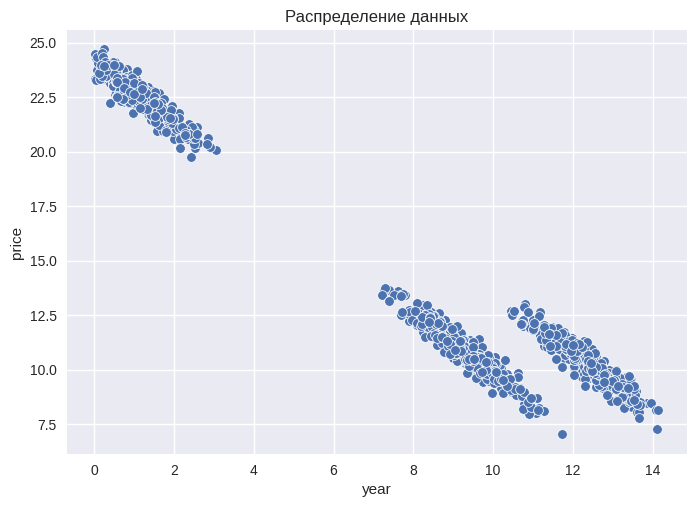

In [ ]:
# Посмотрим на наши данные, где представлены цены на однокомнатные квартиры и возраст этих квартир
sns.scatterplot(x=df['year'], y=df['price'])
plt.title('Распределение данных')
plt.show()

**1. Взять датасет(приложен в материалах - DZ_2_9.csv) в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?**

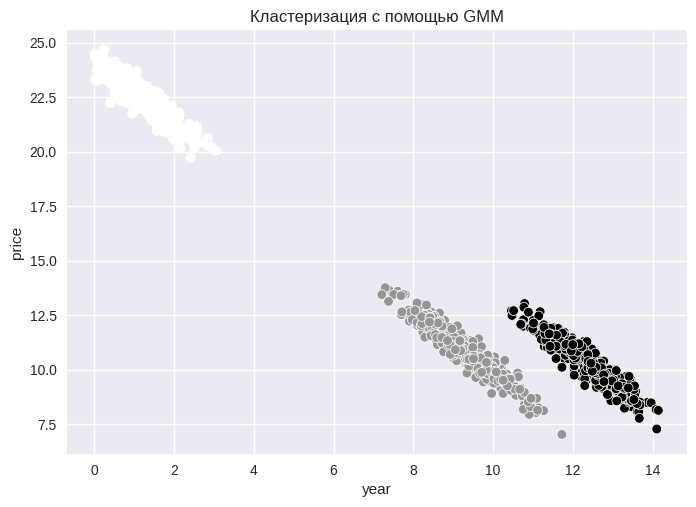

In [ ]:
from sklearn.mixture import GaussianMixture

gc = GaussianMixture(n_components=3)
pred = gc.fit_predict(df[['year', 'price']])
sns.scatterplot(x=df.year, y=df.price, c=pred, palette='Set1')
plt.title('Кластеризация с GMM')
plt.show()

**Вывод:** как видно, после кластеризации, оптимальное количество кластеров — 3, и модель показывает хорошие результаты работы с данными, справляясь со всем

**2. Проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?**

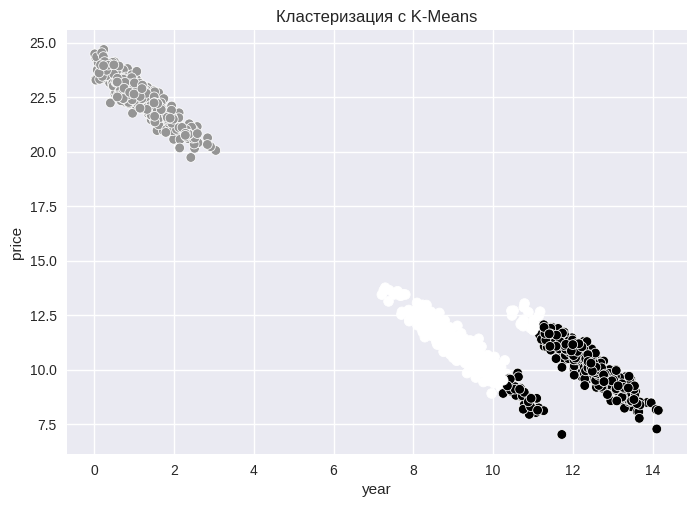

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
pred = km.fit_predict(df[['year', 'price']])
sns.scatterplot(x=df.year, y=df.price, c=pred, palette='Set2')
plt.title('Кластеризация с K-Means')
plt.show()

**Вывод:** как видно из визуализации, алгоритм k-means не справляется с кластеризацией, в отличие от модели гауссовой смеси (Gaussian Mixture Model, GMM), в котором данные описываются функцией Гаусса, отлично справился с кластеризацией, не как k-means

**3. ДОП: Проведите кластеризацию DBSCAN с параметрами по умолчанию. Сколько точек было размечено как выбросы? Попробовать подобрать eps и min_samples так, чтобы ушел хотя бы один выброс**

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()
dbscan_pred = dbscan.fit_predict(df[['year', 'price']])

Количество выбросов при DBSCAN с параметрами по умолчанию: 2


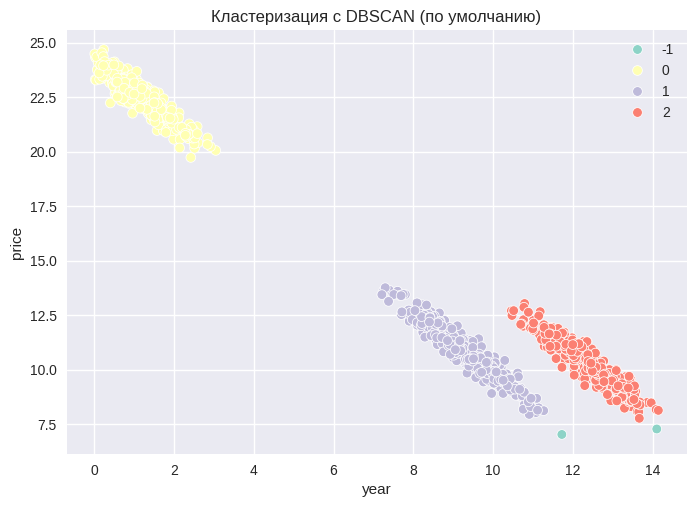

In [ ]:
# Определяем количество выбросов (кластер -1 это выбросы)
outliers = np.sum(dbscan_pred == -1)
print(f'Количество выбросов при DBSCAN с параметрами по умолчанию: {outliers}')

sns.scatterplot(x=df.year, y=df.price, hue=dbscan_pred, palette='Set3')
plt.title('Кластеризация с DBSCAN (по умолчанию)')
plt.show()

Количество выбросов при DBSCAN с eps=1 и min_samples=5: 1


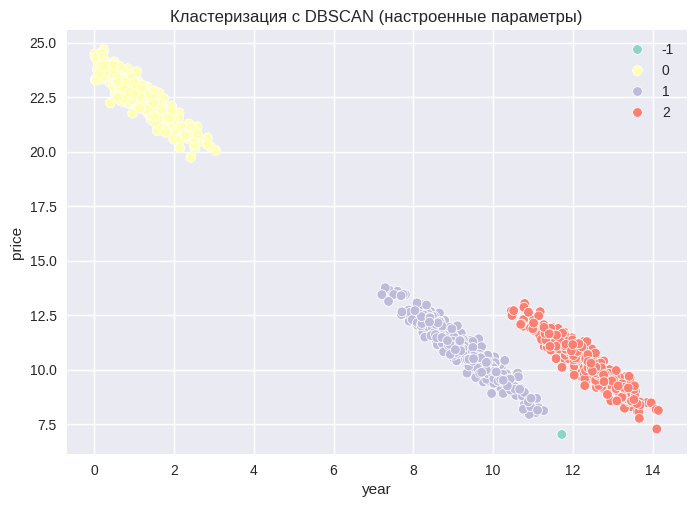

In [ ]:
# Настройка параметров eps и min_samples для уменьшения количества выбросов
dbscan_tuned = DBSCAN(eps=1, min_samples=5)
dbscan_tuned_pred = dbscan_tuned.fit_predict(df[['year', 'price']])

# Определяем количество выбросов после настройки
tuned_outliers = np.sum(dbscan_tuned_pred == -1)
print(f'Количество выбросов при DBSCAN с eps=1 и min_samples=5: {tuned_outliers}')

sns.scatterplot(x=df.year, y=df.price, hue=dbscan_tuned_pred, palette='Set3')
plt.title('Кластеризация с DBSCAN (настроенные параметры)')
plt.show()

**Вывод:** визуализация показывает, что при уменьшении количества выбросов с 2 до 1, что правильная настройка параметров позволяет более точно определить границы кластеров и снизить количество ложных выбросов, что ясно выражено на графиках